# Posteriori 

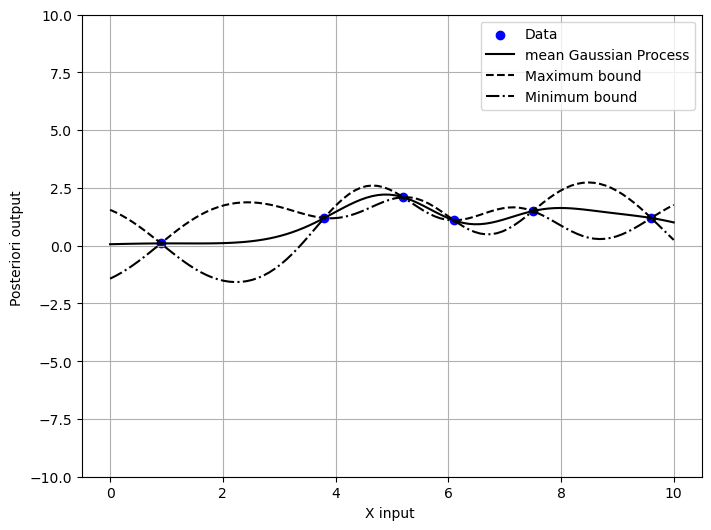

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
n=100 # inputs 
n_data= 6
x = np.linspace(0, 10, n) # input
mu_input         = np.linspace(0, 0, n) # for posteriori
variance_input   = np.linspace(0, 0, n) # for posteriori
deviation_input  = np.linspace(0, 0, n) # for Posterior
x_data = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6]).reshape(6,1)
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)

# covariance matrix
K = np.zeros((n_data,n_data))
for i in range (n_data):
   for j in range (n_data): 
     K[i,j]=math.exp((-0.5*(x_data [i,0]-x_data [j,0])**2))
k_inv=np.linalg.inv(K)
K_inv_y=np.dot(k_inv ,y)

# k for each x
k_x= np.zeros(n_data)
for j in range (n): 
  for i in range (n_data):
    k_x[i]= math.exp((-0.5*(x[j]-x_data[i,0])**2))
  mu_input [j]= np.dot(k_x.reshape(1,n_data),K_inv_y)[0,0]
  variance_input[j]=1.0 - np.dot(k_x.reshape(1,n_data) , np.dot(k_inv ,k_x.reshape(n_data,1)))[0,0]
deviation_input = np.sqrt(variance_input)


plt.figure(figsize=(8, 6))

plt.scatter(x_data ,y , color='blue', label = 'Data')
plt.plot(x ,mu_input,'-k' ,label ='mean Gaussian Process'  )
plt.plot(x ,mu_input + 2*deviation_input,'--k', label='Maximum bound' )
plt.plot(x ,mu_input - 2*deviation_input , '-.k',label='Minimum bound' )
plt.xlabel('X input ')
plt.ylabel('Posteriori output ')
plt.legend()
plt.ylim(-10, 10)

plt.grid(True)
plt.show()

# Priori 

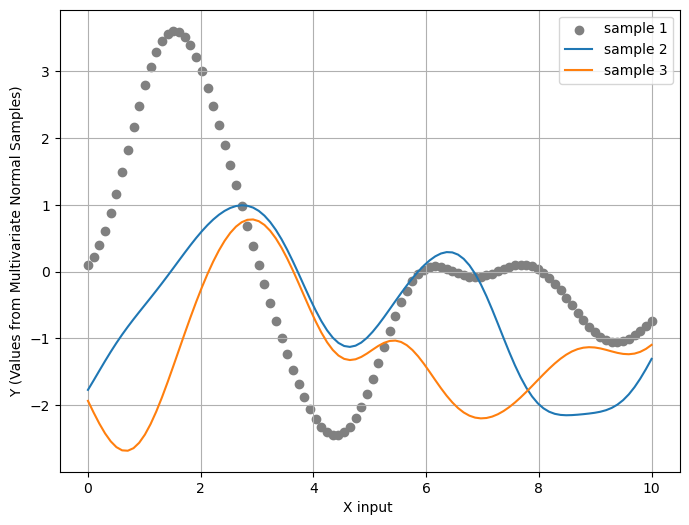

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
n=100 
x = np.linspace(0, 10, n)
mu = np.linspace(0, 0, n)

# covariance matrix
gamma=1
sigma = np.zeros((n,n))
for i in range (n):
   for j in range (n): 
     sigma[i,j]=math.exp((-0.5*(x[i]-x[j])**2))

# Generate 4 random samplesp for priori
samples = np.random.multivariate_normal(mu, sigma, size=3).T

# Plot each column of the samples against x
plt.figure(figsize=(8, 6))

plt.scatter(x , samples[:, 0],color='gray', label=f'sample {1}')

for i in range(1,3):
    plt.plot(x , samples[:, i], label=f'sample {i+1}')
plt.xlabel('X input ')
plt.ylabel('Y (Values from Multivariate Normal Samples)')
#plt.title('Multivariate Normal Samples (11 Dimensions)')
plt.legend()
plt.grid(True)
plt.show()

# Optimization of Hyperparameters

## Variation in Gamma 

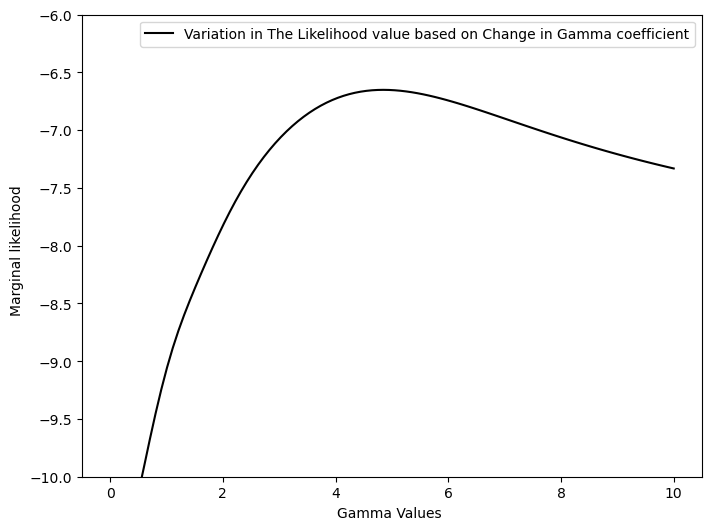

In [513]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
n_data= 6
x   = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6]).reshape(6,1)
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
# Hyper_parameters _just for example
gamma   = 1 # ceta[0]
sigma_f = 1 # ceta[1]
sigma_n = 0 # ceta[2]
# ceta has the hyperparameters (gamma, sigma_f^2, sigma_n^2)

ceta=[1,1,0]
# covariance matrix
def covaraince(x,ceta):
        n_data = len(x)
        K = np.zeros((n_data,n_data))
        for i in range (n_data):
           for j in range (n_data): 
               if i==j:
                  K[i,j]=(ceta[1]**2)*math.exp(-(0.5/(ceta[0]**2))*(x[i,0]-x[j,0])**2) +(ceta[2]**2)
               else:
                  K[i,j]=(ceta[1]**2)*math.exp(-(0.5/(ceta[0]**2))*(x[i,0]-x[j,0])**2) 
        return K

def Liklihood_fun(x,y,ceta):
     n_data = len(x)
     K      = covaraince(x,ceta)
     K_inv  = np.linalg.inv(K)
     K_det  = np.linalg.det(K)
     likelihood = (-1/2)*np.dot(y.T, np.dot(K_inv,y ))-(1/2)*math.log(K_det )-(n_data/2)*math.log(2*math.pi)
     return likelihood
n=100 
c = np.linspace(0.0000001, 10, n)
likelihood=np.zeros(n)
ceta=[4.84711844, 1.045064 ,  0.44071752]
# variang over gamma 
for i in range(n):
    ceta[0]=c[i]
    likelihood[i]=Liklihood_fun(x,y,ceta)[0,0]
plt.figure(figsize=(8, 6))
plt.plot(c  ,likelihood,'-k' ,label ='Variation in The Likelihood value based on Change in Gamma coefficient'  )  
plt.ylim(-10,-6)
plt.xlabel('Gamma Values ')
plt.ylabel('Marginal likelihood  ')
plt.legend()

In [501]:
list(likelihood).index(max(likelihood))

48

In [503]:
c[list(likelihood).index(max(likelihood))]

4.848484900000001

In [505]:
likelihood[48]

-6.650419202515549

## variation in sigmma f

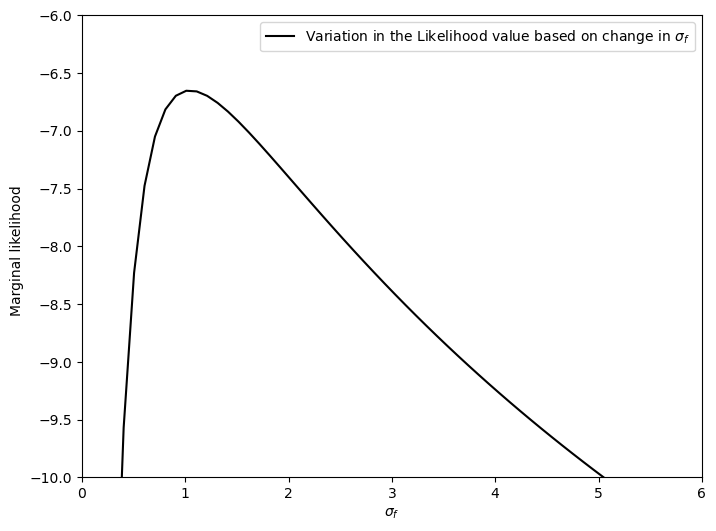

In [521]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
n_data= 6
x   = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6]).reshape(6,1)
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
# Hyper_parameters _just for example
gamma   = 1 # ceta[0]
sigma_f = 1 # ceta[1]
sigma_n = 0 # ceta[2]
# ceta has the hyperparameters (gamma, sigma_f^2, sigma_n^2)

ceta=[1,1,0]
# covariance matrix
def covaraince(x,ceta):
        n_data = len(x)
        K = np.zeros((n_data,n_data))
        for i in range (n_data):
           for j in range (n_data): 
               if i==j:
                  K[i,j]=(ceta[1]**2)*math.exp(-(0.5/(ceta[0]**2))*(x[i,0]-x[j,0])**2) +(ceta[2]**2)
               else:
                  K[i,j]=(ceta[1]**2)*math.exp(-(0.5/(ceta[0]**2))*(x[i,0]-x[j,0])**2) 
        return K

def Liklihood_fun(x,y,ceta):
     n_data = len(x)
     K      = covaraince(x,ceta)
     K_inv  = np.linalg.inv(K)
     K_det  = np.linalg.det(K)
     likelihood = (-1/2)*np.dot(y.T, np.dot(K_inv,y ))-(1/2)*math.log(K_det )-(n_data/2)*math.log(2*math.pi)
     return likelihood
n=100 
c = np.linspace(0.0000001, 10, n)
likelihood=np.zeros(n)
ceta=[4.84711844, 1.045064 ,  0.44071752]
# variang over gamma 
for i in range(n):
    ceta[1]=c[i]
    likelihood[i]=Liklihood_fun(x,y,ceta)[0,0]
plt.figure(figsize=(8, 6))
plt.plot(c, likelihood, '-k', label=r'Variation in the Likelihood value based on change in $\sigma_f$')

plt.ylim(-10,-6)
plt.xlim(0,6)

plt.xlabel(r'$\sigma_f$')
plt.ylabel('Marginal likelihood  ')
plt.legend()

In [493]:
list(likelihood).index(max(likelihood))

10

In [495]:
c[list(likelihood).index(max(likelihood))]

1.0101011000000002

In [497]:
likelihood[10]

-6.653051283866101

## varaiation in sigmma n

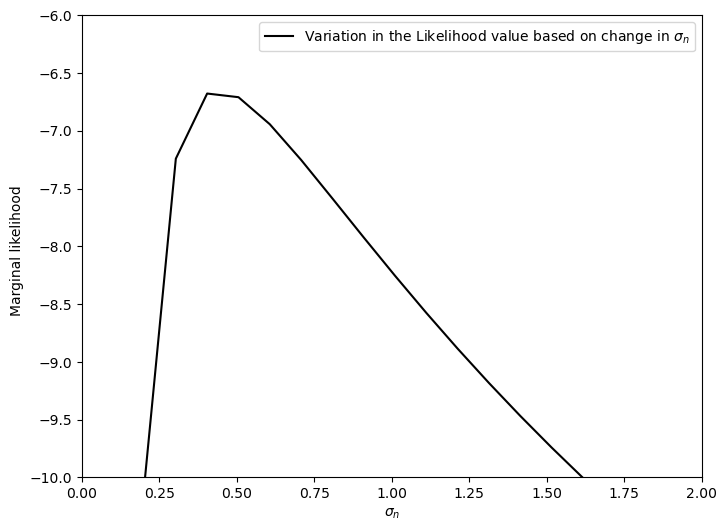

In [519]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
n_data= 6
x   = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6]).reshape(6,1)
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
# Hyper_parameters _just for example
gamma   = 1 # ceta[0]
sigma_f = 1 # ceta[1]
sigma_n = 0 # ceta[2]
# ceta has the hyperparameters (gamma, sigma_f^2, sigma_n^2)

ceta=[1,1,0]
# covariance matrix
def covaraince(x,ceta):
        n_data = len(x)
        K = np.zeros((n_data,n_data))
        for i in range (n_data):
           for j in range (n_data): 
               if i==j:
                  K[i,j]=(ceta[1]**2)*math.exp(-(0.5/(ceta[0]**2))*(x[i,0]-x[j,0])**2) +(ceta[2]**2)
               else:
                  K[i,j]=(ceta[1]**2)*math.exp(-(0.5/(ceta[0]**2))*(x[i,0]-x[j,0])**2) 
        return K

def Liklihood_fun(x,y,ceta):
     n_data = len(x)
     K      = covaraince(x,ceta)
     K_inv  = np.linalg.inv(K)
     K_det  = np.linalg.det(K)
     likelihood = (-1/2)*np.dot(y.T, np.dot(K_inv,y ))-(1/2)*math.log(K_det )-(n_data/2)*math.log(2*math.pi)
     return likelihood
n=100 
c = np.linspace(0.0000001, 10, n)
likelihood=np.zeros(n)
ceta=[4.84711844 ,1.045064 ,  0.44071752]
# variang over gamma 
for i in range(n):
    ceta[2]=c[i]
    likelihood[i]=Liklihood_fun(x,y,ceta)[0,0]
plt.figure(figsize=(8, 6))
plt.plot(c, likelihood, '-k', label=r'Variation in the Likelihood value based on change in $\sigma_n$')

plt.xlim(0, 2)
plt.ylim(-10,-6)

plt.xlabel(r'$\sigma_n$')
plt.ylabel('Marginal likelihood  ')
plt.legend()

In [483]:
list(likelihood).index(max(likelihood))

4

In [485]:
c[list(likelihood).index(max(likelihood))]

0.4040405

In [487]:
likelihood[4]

-6.677157115609349

## Recompute the posteriori with optimum parameters and non-zero noise

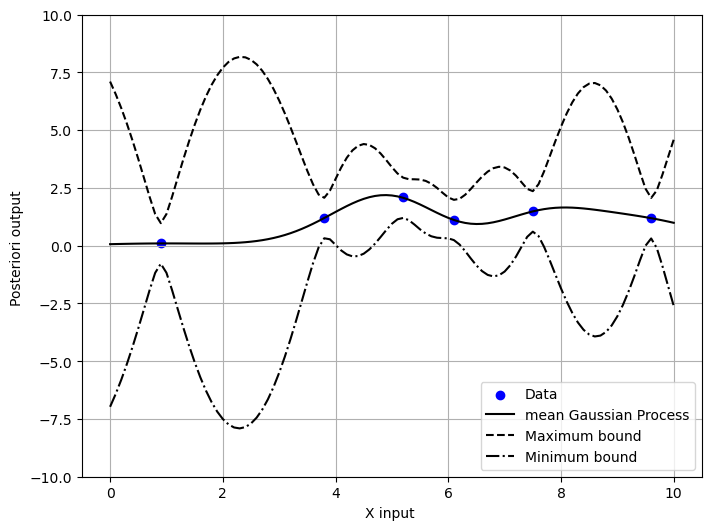

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
n=101 # inputs 
n_data= 6
x = np.linspace(0, 10, n) # input
mu_input         = np.linspace(0, 0, n) # for posteriori
variance_input   = np.linspace(0, 0, n) # for posteriori
deviation_input  = np.linspace(0, 0, n) # for Posterior
x_data = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6]).reshape(6,1)
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
sigma_n =0.44071752
sigma_f =4.84711844 
gamma = 1.045064   
# covariance matrix
K = np.zeros((n_data,n_data))
for i in range (n_data):
   for j in range (n_data): 
       if i==j : 
            K[i,j]=(sigma_f**2)*math.exp(-(0.5/(gamma**2))*(x_data[i,0]-x_data[j,0])**2) + (sigma_n**2)

       else:
            K[i,j]=(sigma_f**2)*math.exp(-(0.5/(gamma**2))*(x_data[i,0]-x_data[j,0])**2) 
k_inv=np.linalg.inv(K)
K_inv_y=np.dot(k_inv ,y)

# k for each x
k_x= np.zeros(n_data)
for j in range (n): 
  for i in range (n_data):
               
                   k_x[i]= (sigma_f**2)*math.exp( -(0.5/(gamma**2))*(x[j]-x_data[i,0])**2)
               
      
  mu_input [j]= np.dot(k_x.reshape(1,n_data),K_inv_y)[0,0]
  variance_input[j]=abs((sigma_f**2) - np.dot(k_x.reshape(1,n_data) , np.dot(k_inv ,k_x.reshape(n_data,1)))[0,0])
deviation_input = np.sqrt(variance_input)

#+(sigma_n**2)
plt.figure(figsize=(8, 6))

plt.scatter(x_data ,y , color='blue', label = 'Data')
plt.plot(x ,mu_input,'-k' ,label ='mean Gaussian Process'  )
plt.plot(x ,mu_input + 2*deviation_input,'--k', label='Maximum bound' )
plt.plot(x ,mu_input - 2*deviation_input , '-.k',label='Minimum bound' )
plt.xlabel('X input ')
plt.ylabel('Posteriori output ')
plt.legend()
plt.ylim(-10, 10)

plt.grid(True)
plt.show()

## Optimization Algorithm

In [526]:
from scipy.optimize import minimize

# Original function you want to maximize
def Liklihood_fun_opt(ceta):
     x   = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6]).reshape(6,1)
     y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
     n_data = len(x)
     K      = covaraince(x,ceta)
     K_inv  = np.linalg.inv(K)
     K_det  = np.linalg.det(K)
     likelihood = (-1/2)*np.dot(y.T, np.dot(K_inv,y ))-(1/2)*math.log(K_det )-(n_data/2)*math.log(2*math.pi)
     return likelihood

# Define the negative for minimization
def neg_f(ceta):
    return -Liklihood_fun_opt(ceta)
#ceta=[4.74,1.01,0.404]
ceta=[1,1.00,0]
# Run optimization
result = minimize(neg_f, ceta)  # x0 is the initial guess

# Output the result
max_x = result.x
max_value = Liklihood_fun_opt(max_x)

print("Maximum value:", max_value)
print("At x =", max_x)

Maximum value: [[-6.65041903]]
At x = [4.84712108 1.04506427 0.44071774]


## Recompute the posteriori with parameters (used in the optimum case) and non-zero mean

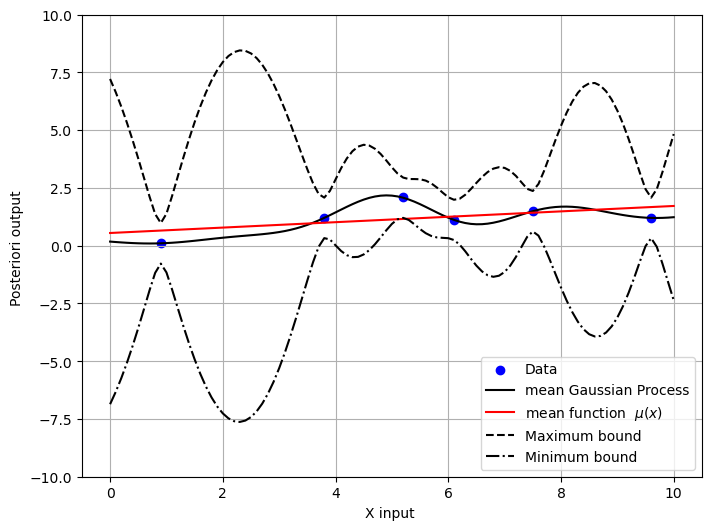

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
w1=0.551
w2=0.117
n=101 # inputs 
n_data= 6
x = np.linspace(0, 10, n) # input
mu_input         = np.linspace(0, 0, n) # for posteriori
variance_input   = np.linspace(0, 0, n) # for posteriori
deviation_input  = np.linspace(0, 0, n) # for Posterior
x_data = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6]).reshape(6,1)
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
y_m=y-(w1+w2*x_data)
sigma_n =0.44071752
sigma_f =4.84711844 
gamma = 1.045064   
# covariance matrix
K = np.zeros((n_data,n_data))
for i in range (n_data):
   for j in range (n_data): 
       if i==j : 
            K[i,j]=(sigma_f**2)*math.exp(-(0.5/(gamma**2))*(x_data[i,0]-x_data[j,0])**2) + (sigma_n**2)

       else:
            K[i,j]=(sigma_f**2)*math.exp(-(0.5/(gamma**2))*(x_data[i,0]-x_data[j,0])**2) 
k_inv=np.linalg.inv(K)
K_inv_y=np.dot(k_inv ,y_m)

# k for each x
k_x= np.zeros(n_data)
for j in range (n): 
  for i in range (n_data):
               
                   k_x[i]= (sigma_f**2)*math.exp( -(0.5/(gamma**2))*(x[j]-x_data[i,0])**2)
               
      
  mu_input [j]= w1+w2*x[j] + np.dot(k_x.reshape(1,n_data),K_inv_y)[0,0]
  variance_input[j]=abs((sigma_f**2) - np.dot(k_x.reshape(1,n_data) , np.dot(k_inv ,k_x.reshape(n_data,1)))[0,0])
deviation_input = np.sqrt(variance_input)

#+(sigma_n**2)
plt.figure(figsize=(8, 6))

plt.scatter(x_data ,y , color='blue', label = 'Data')
plt.plot(x ,mu_input,'-k' ,label ='mean Gaussian Process'  )
plt.plot(x ,0.551+0.117*x,'-r' ,label =r'mean function  $\mu(x)$'  )
plt.plot(x ,mu_input + 2*deviation_input,'--k', label='Maximum bound' )
plt.plot(x ,mu_input - 2*deviation_input , '-.k',label='Minimum bound' )
plt.xlabel('X input ')
plt.ylabel('Posteriori output ')
plt.legend()
plt.ylim(-10, 10)

plt.grid(True)
plt.show()